<a href="https://colab.research.google.com/github/esuda/mineiracao_dados_complexos/blob/master/INF0618_Trabalho_01_Kurosawa_Suda_Wakabayashi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inf0618 Deep Learning - Trabalho 1 - CNN**
## Integrantes do grupo:
#### - Daniel Noriaki Kurosawa
#### - Eric Uyemura Suda
#### - Fernando Shigeru Wakabayashi

In [16]:
#Importando as libs necessarias

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras import layers

import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

In [54]:
# Funcoes auxiliares

def fit_train_eval(model, x_train, y_train_oh, y_val, epochs, batch_size, class_weight, validation_data):
  print("Treinando o Modelo \n\n")
  history = model.fit(x_train, 
                      y_train_oh, 
                      epochs=epochs, 
                      batch_size=batch_size, 
                      class_weight=class_weight,
                      validation_data=validation_data)
  
  # Faz as predições para o conjunto de teste
  print("\nFazendo Predicoes da Validacao\n")
  predictions = model_baseline.predict(x_val)
  #score = model.evaluate(x_test, y_test_oh, verbose=1) # Poderia ser usado se o objetivo é ter apenas a métrica.

  #Matriz de confusão
  cm = confusion_matrix(np.argmax(predictions, axis=1), y_val)
  plt.figure(figsize = (11,9))
  ax1=plt.axes()
  ax1.set_title("Matriz de Confusao")
  sns.set(font_scale=0.9)
  sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')

  # Matriz de confusão normalizada
  cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
  balanced_acc = np.trace(cmn) / num_classes
  print("\n\nAcurácia balanceada:", balanced_acc, "\n")

  plt.figure(figsize = (11,9))
  ax = plt.axes()
  ax.set_title("Matriz de Confusao Balanceada")
  sns.set(font_scale=0.9)
  sns.heatmap(cmn, annot=True, fmt='.1%', cmap='viridis')

  # Curva de Vies Varianca
  return history

In [2]:
#Importando Dataset do trabalho

from tensorflow.keras.datasets import cifar10
(x_trainval, y_trainval), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
#Cada imagem tem o tamanho de 32x32x3

print("Tamanho treino {}".format(x_trainval.shape), "\t", "Tamanho teste {}".format(x_test.shape))

Tamanho treino (50000, 32, 32, 3) 	 Tamanho teste (10000, 32, 32, 3)


In [4]:
#Dataset ja esta balanceado com 5k amostras para cada classe de imagem

unique, counts = np.unique(y_trainval, return_counts=True)
print("Treino ---> ", dict(zip(unique, counts)), "\n")

Treino --->  {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000} 



## 1) Separando Dataset em Treino e Validacao

In [5]:
#Separando o dataset em treino(80%) e validacao(20%)

#Embaralha os dados e divide em 80% para treino, 20% para validação
nData = x_trainval.shape[0]  
nTrain = int(nData * 0.8)  
randomIdx = np.random.permutation(np.arange(nData))
trainIdx = randomIdx[:nTrain] 
valIdx = randomIdx[nTrain:]

#Divide os dados
x_val, y_val = x_trainval[valIdx], y_trainval[valIdx]
x_train, y_train = x_trainval[trainIdx], y_trainval[trainIdx]

print("Formato das imagens de treinamento", x_train.shape)
print("Formato dos rótulos de treinamento", y_train.shape)
print()

print("Formato das imagens de validação", x_val.shape)
print("Formato dos rótulos de validação", y_val.shape)

Formato das imagens de treinamento (40000, 32, 32, 3)
Formato dos rótulos de treinamento (40000, 1)

Formato das imagens de validação (10000, 32, 32, 3)
Formato dos rótulos de validação (10000, 1)


In [6]:
# Escalando dados de para um intervalo de 0-1

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [8]:
# One hot encoding das classes de saida

num_classes = len(np.unique(y_train))
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_oh = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape, y_train_oh.shape)
print("Exemplo: ")
print("Classe Imagem: ", y_train[0], "\tOne Hot: ", y_train_oh[0])

(40000, 32, 32, 3) (40000, 10)
Exemplo: 
Classe Imagem:  [1] 	One Hot:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## 2) Criando Rede Neural Baseline

In [26]:
# Rede Neural Vanilla

model_baseline = tf.keras.Sequential()
#Camada convolucional com 10 filtros de tamanho 3x3 e ativação ReLU
model_baseline.add(layers.Conv2D(10, 3, padding='valid', activation='relu', input_shape=(32, 32, 3)))
#Max pooling de tamanho 2x2
model_baseline.add(layers.MaxPooling2D(pool_size=(2,2)))
#Operação de vetorização dos dados
model_baseline.add(layers.Flatten())
#Densa com 10 nós de saída
model_baseline.add(layers.Dense(10))

model_baseline.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_baseline.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2250)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                22510     
Total params: 22,790
Trainable params: 22,790
Non-trainable params: 0
_________________________________________________________________


Treinando o Modelo 


Epoch 1/25
400/400 [==============================] - 15s 38ms/step - loss: 1.8455 - accuracy: 0.3469 - val_loss: 1.8739 - val_accuracy: 0.3418
Epoch 2/25
400/400 [==============================] - 15s 38ms/step - loss: 1.8332 - accuracy: 0.3533 - val_loss: 1.8568 - val_accuracy: 0.3383
Epoch 3/25
400/400 [==============================] - 15s 38ms/step - loss: 1.8356 - accuracy: 0.3531 - val_loss: 1.9344 - val_accuracy: 0.3062
Epoch 4/25
400/400 [==============================] - 15s 38ms/step - loss: 1.8353 - accuracy: 0.3501 - val_loss: 1.8676 - val_accuracy: 0.3355
Epoch 5/25
400/400 [==============================] - 15s 38ms/step - loss: 1.8377 - accuracy: 0.3517 - val_loss: 1.8482 - val_accuracy: 0.3435
Epoch 6/25
400/400 [==============================] - 15s 38ms/step - loss: 1.8339 - accuracy: 0.3507 - val_loss: 1.8516 - val_accuracy: 0.3514
Epoch 7/25
400/400 [==============================] - 15s 38ms/step - loss: 1.8352 - accuracy: 0.3492 - val_loss: 

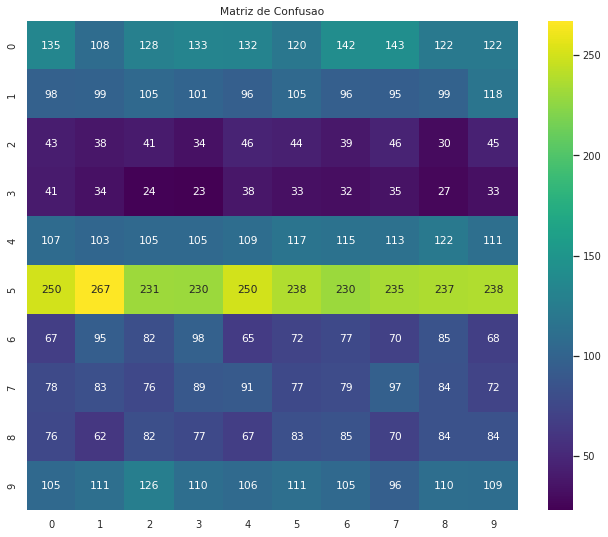

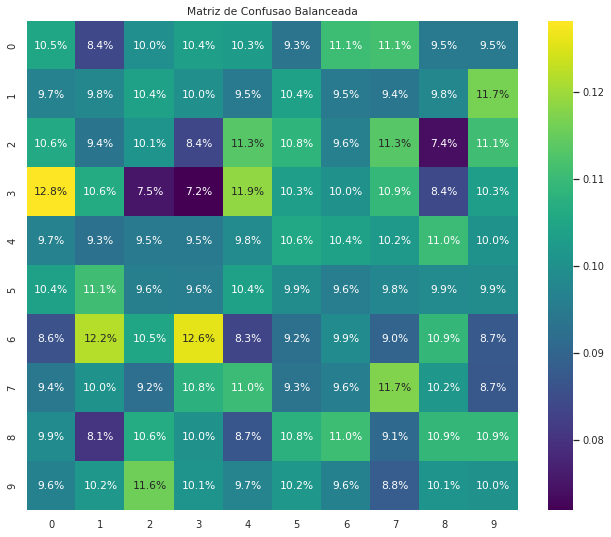

In [58]:
fit_train_eval(model_baseline, x_train, y_train_oh, y_val, epochs=32, batch_size=50, class_weight=None, validation_data=(x_val, y_val_oh))

## 3) Testando Diferentes Funcoes de Ativacao Para o Mesmo Modelo Baseline

[Referencia de Funcoes de Ativacao](https://keras.io/api/layers/activations/)



In [44]:
# Modelo Vanilla com Funcao de Ativacao Sigmoide

model_baseline_sig = tf.keras.Sequential()
#Camada convolucional com 10 filtros de tamanho 3x3 e ativação Sigmoide
model_baseline_sig.add(layers.Conv2D(10, 3, padding='valid', activation='sigmoid', input_shape=(32, 32, 3)))
#Max pooling de tamanho 2x2
model_baseline_sig.add(layers.MaxPooling2D(pool_size=(2,2)))
#Operação de vetorização dos dados
model_baseline_sig.add(layers.Flatten())
#Densa com 10 nós de saída
model_baseline_sig.add(layers.Dense(10))

model_baseline_sig.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_baseline_sig.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2250)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                22510     
Total params: 22,790
Trainable params: 22,790
Non-trainable params: 0
_________________________________________________________________


In [59]:
fit_train_eval(model_baseline_sig, x_train, y_train_oh, y_val, epochs=50, batch_size=32, class_weight=None, validation_data=(x_val, y_val_oh))

Treinando o Modelo 


Epoch 1/25
400/400 [==============================] - 16s 41ms/step - loss: 1.2443 - accuracy: 0.5735 - val_loss: 1.3629 - val_accuracy: 0.5415
Epoch 2/25
400/400 [==============================] - 16s 41ms/step - loss: 1.2249 - accuracy: 0.5827 - val_loss: 1.3951 - val_accuracy: 0.5333
Epoch 3/25
400/400 [==============================] - 17s 41ms/step - loss: 1.1965 - accuracy: 0.5952 - val_loss: 1.4394 - val_accuracy: 0.5249
Epoch 4/25
400/400 [==============================] - 16s 41ms/step - loss: 1.1886 - accuracy: 0.5962 - val_loss: 1.4710 - val_accuracy: 0.5218
Epoch 5/25
286/400 [====================>.........] - ETA: 4s - loss: 1.1654 - accuracy: 0.6034

KeyboardInterrupt: ignored

In [52]:
# Modelo Vanilla com Funcao de Ativacao Tangente Hiperbolica

model_baseline_hip = tf.keras.Sequential()
#Camada convolucional com 10 filtros de tamanho 3x3 e ativação Sigmoide
model_baseline_hip.add(layers.Conv2D(10, 3, padding='valid', activation='tanh', input_shape=(32, 32, 3)))
#Max pooling de tamanho 2x2
model_baseline_hip.add(layers.MaxPooling2D(pool_size=(2,2)))
#Operação de vetorização dos dados
model_baseline_hip.add(layers.Flatten())
#Densa com 10 nós de saída
model_baseline_hip.add(layers.Dense(10))

model_baseline_hip.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_baseline_hip.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2250)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                22510     
Total params: 22,790
Trainable params: 22,790
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_train_eval(model_baseline_hip, x_train, y_train_oh, y_val, epochs=50, batch_size=32, class_weight=None, validation_data=(x_val, y_val_oh))

In [ ]:
# Modelo Vanilla com Funcao de Ativacao SeLu

model_baseline_selu = tf.keras.Sequential()
#Camada convolucional com 10 filtros de tamanho 3x3 e ativação Sigmoide
model_baseline_selu.add(layers.Conv2D(10, 3, padding='valid', activation='selu', input_shape=(32, 32, 3)))
#Max pooling de tamanho 2x2
model_baseline_selu.add(layers.MaxPooling2D(pool_size=(2,2)))
#Operação de vetorização dos dados
model_baseline_selu.add(layers.Flatten())
#Densa com 10 nós de saída
model_baseline_selu.add(layers.Dense(10))

model_baseline_selu.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_baseline_selu.summary()

In [ ]:
fit_train_eval(model_baseline_selu, x_train, y_train_oh, y_val, epochs=25, batch_size=100, class_weight=None, validation_data=(x_val, y_val_oh))